# Guitar classification

In this notebook, we create a neural network that will classify whether an input image is an electric guitar or an acoustic guitar. 

We will scrape images from Google Images and train using the `fastai` library


In [1]:
from fastai.vision import *

## Get image URLs 

We will search for the images we want, and copy and paste the following javascript code to the console to download a file containing the image links.

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Upload the csv files to the jupyter runtime. 

Run the following cells individually for each class.

In [2]:
folder = 'electric'
file = 'urls_electric.csv'

In [6]:
folder = 'acoustic'
file = 'urls_acoustic.csv'

In [7]:
path = Path('data/guitar')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

## Download images

In [8]:
classes = ['electric','acoustic']

In [9]:
download_images(path/file, dest, max_pics=400)

Remove any images that can't be opened

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)
    print(f"Number of images: {len((path/c).ls())}")

electric


Number of images: 320
acoustic


Number of images: 320


## View data

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
      ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['acoustic', 'electric']

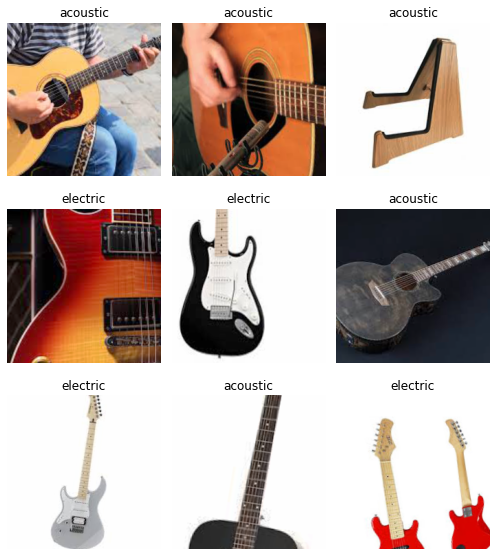

In [13]:
data.show_batch(3, figsize=(7, 8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['acoustic', 'electric'], 2, 512, 128)

## Train model

Fine tuning on a ResNet34 pretrained on ImageNet.

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.096586,0.430556,0.125000,00:08
1,0.763590,0.498526,0.109375,00:08
2,0.601689,0.491814,0.085938,00:08
3,0.507029,0.482877,0.093750,00:08


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


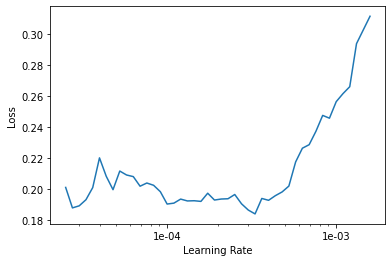

In [18]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.345191,0.553619,0.101562,00:09
1,0.300858,0.537742,0.109375,00:09


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [20]:
learn.save("stage-2")

## Interpretation

In [24]:
learn.load("stage-1");

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

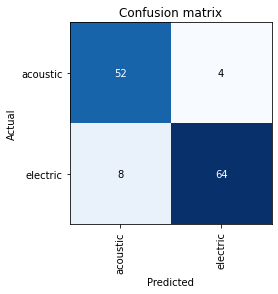

In [26]:
interp.plot_confusion_matrix()

## Cleaning up

In [27]:
from fastai.widgets import *

In [28]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [29]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Putting the model in production

In [32]:
learn.export()

In [34]:
defaults.device = torch.device('cpu')

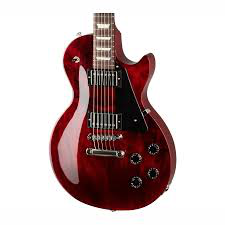

In [37]:
img = open_image(path/'electric'/'00000001.jpg')
img

In [38]:
learn = load_learner(path)

In [39]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class.obj

'electric'